In [23]:
import sys
sys.path.insert(0, '../src')

from NN import *
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

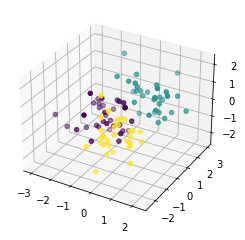

In [24]:
X, y = make_blobs(n_samples=100, n_features=3, centers=((1, 1,1), (5, 5,5), (3,-1,0)), cluster_std = 2)

X = StandardScaler().fit_transform(X)
ax = plt.subplot(projection='3d')
ax.scatter3D( X[:,0], X[:,1], X[:,2], c=y)

N = y.size
# one hot encoding
y_oh = np.zeros((N, 3))
y_oh[np.arange(N), y] = 1

In [25]:
X.shape, y.shape, y_oh.shape, type(X), type(y)

((100, 3), (100,), (100, 3), numpy.ndarray, numpy.ndarray)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y_oh, test_size=0.30)

In [27]:
y_train.shape, X_train.shape

((70, 3), (70, 3))

In [28]:
test_model = NN(3)
test_model.add(3, 'sigmoid')
test_model.add(3, 'softmax')
print(test_model.layer)

2


In [31]:
test_model.hyper(learning_rate=0.01, epochs=2)
test_model.fit(X_train, y_train, visible=True)

epoch 0
epoch 1
